In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
import time

start_time=time.time()

# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

train_time=time.time()-start_time

print("Training time: ", train_time)

Epoch 1/15
750/750 [==============================] - 41s 52ms/step - loss: 0.5749 - accuracy: 0.7881 - val_loss: 0.4249 - val_accuracy: 0.8462
Epoch 2/15
750/750 [==============================] - 50s 66ms/step - loss: 0.3616 - accuracy: 0.8690 - val_loss: 0.3485 - val_accuracy: 0.8779
Epoch 3/15
750/750 [==============================] - 56s 75ms/step - loss: 0.3127 - accuracy: 0.8858 - val_loss: 0.3031 - val_accuracy: 0.8922
Epoch 4/15
750/750 [==============================] - 50s 67ms/step - loss: 0.2809 - accuracy: 0.8958 - val_loss: 0.2967 - val_accuracy: 0.8951
Epoch 5/15
750/750 [==============================] - 48s 64ms/step - loss: 0.2564 - accuracy: 0.9056 - val_loss: 0.2822 - val_accuracy: 0.8978
Epoch 6/15
750/750 [==============================] - 48s 64ms/step - loss: 0.2387 - accuracy: 0.9122 - val_loss: 0.3181 - val_accuracy: 0.8816
Epoch 7/15
750/750 [==============================] - 50s 67ms/step - loss: 0.2210 - accuracy: 0.9187 - val_loss: 0.2677 - val_accuracy:

In [7]:
loss, acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 19ms/step - loss: 0.3127 - accuracy: 0.9061


1/1 [==============================] - 0s 410ms/step


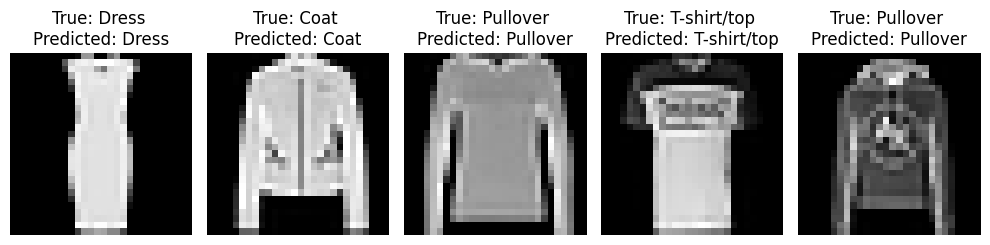

In [8]:
# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

def preprocess_image(image_path):
  """
  Preprocesses a fashion image with black background and white foreground.

  Args:
      image_path: Path to the image file.

  Returns:
      A NumPy array representing the preprocessed image.
  """
  # Read the image
  image = cv2.imread(image_path)
  # Convert BGR (OpenCV default) to RGB (Matplotlib default)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title("Original Image")
  # Display the image
  plt.imshow(image_rgb)
  # plt.axis('off')  # Turn off axis labels
  plt.show()


  # Load the image from the file path in grayscale mode
  img = load_img(image_path, grayscale=True, target_size=(28, 28))
  # Convert the image to a NumPy array
  img_array = img_to_array(img)
  # Invert the grayscale values (black -> white, white -> black)
  img_array = 255 - img_array
  # Show grayscale image
  plt.title("Preprocessed Grayscale Image")
  plt.imshow(img_array, cmap='gray')
  # Reshape the image array to add a dimension for the color channel (even though it's grayscale)
  img_array = img_array.reshape((1, 28, 28, 1))

  # Normalize the pixel values to be between 0 and 1
  return img_array / 255.0

In [ ]:
import tkinter as tk
from tkinter import filedialog
import time

# Create a Tkinter window
root = tk.Tk()
root.title("Fashion MNIST Image Classifier")

# Function to preprocess the image and predict its class
def preprocess_and_predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    start_time = time.time()
    predictions = model.predict(preprocessed_image)
    pred_time = time.time() - start_time
    predicted_class = class_labels[np.argmax(predictions)]
    return predicted_class, pred_time

# Function to browse folder and select an image
def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_class, pred_time = preprocess_and_predict_image(file_path)
        result_label.config(text=f"Predicted Class: {predicted_class}\nPrediction Time: {pred_time:.4f} seconds")

# Create a button to browse the image
browse_button = tk.Button(root, text="Browse Image", command=browse_image)
browse_button.pack(pady=10)

# Label to display the predicted class
result_label = tk.Label(root, text="")
result_label.pack(pady=5)

# Start the Tkinter event loop
root.mainloop()


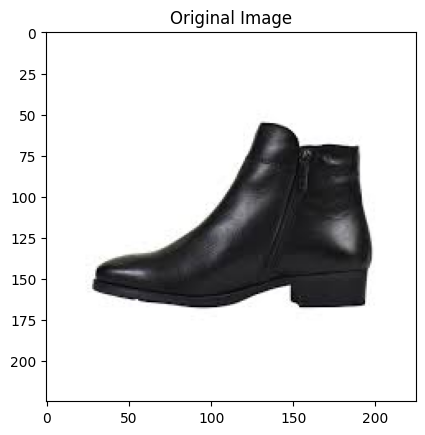

1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


[[2.0137195e-08 2.3488459e-11 1.2395563e-09 3.5486985e-11 3.1505595e-10
  3.9161459e-04 2.1868308e-08 1.6311099e-04 2.3143709e-08 9.9944526e-01]]
Predicted Class:  Ankle boot
Prediction Time:  0.08672285079956055


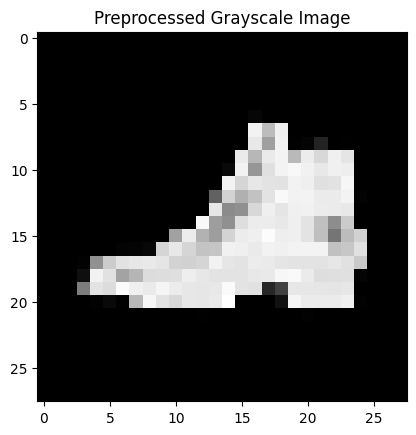

In [ ]:
#predicting the class for real time images
# preprocessed_image = preprocess_image("sample_data/ankleboot.jpeg")
# start_time=time.time()
# predictions = model.predict(preprocessed_image)
# pred_time= time.time()-start_time
# print(predictions)
# print("Predicted Class: ",class_labels[np.argmax(predictions)])
# print("Prediction Time: ", pred_time)

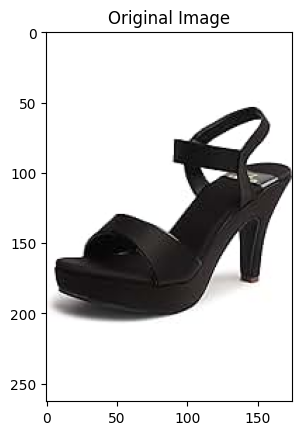

1/1 [==============================] - 0s 20ms/step
[[1.1680336e-10 3.2462548e-22 9.0752863e-15 2.1731468e-23 2.1210686e-20
  1.0000000e+00 2.1663034e-14 3.9752832e-12 1.8223672e-14 3.3557802e-14]]
Predicted Class:  Sandal
Prediction Time:  0.07458019256591797


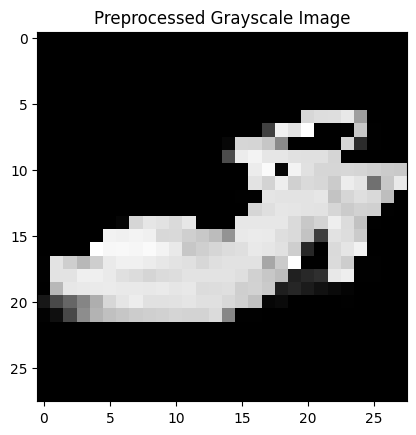

In [ ]:
#predicting the class for real time images
# preprocessed_image = preprocess_image("sample_data/sandal.jpg")
# start_time=time.time()
# predictions = model.predict(preprocessed_image)
# pred_time= time.time()-start_time
# print(predictions)
# print("Predicted Class: ",class_labels[np.argmax(predictions)])
# print("Prediction Time: ", pred_time)

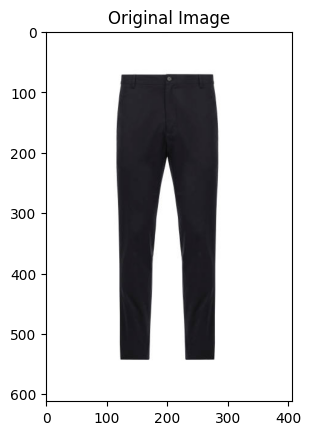

1/1 [==============================] - 0s 50ms/step
[[6.1352208e-09 1.0000000e+00 1.4773420e-13 8.7161025e-12 2.4473392e-13
  6.3626877e-18 2.5399158e-11 1.1681576e-19 1.7269801e-17 4.6595320e-20]]
Predicted Class:  Trouser
Prediction Time:  0.1475353240966797


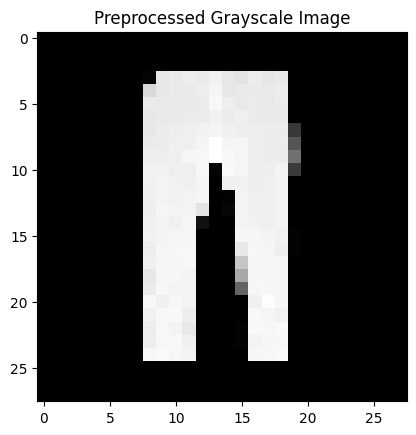

In [ ]:
#predicting the class for real time images
# preprocessed_image = preprocess_image("sample_data/trouser.jpg")
# start_time=time.time()
# predictions = model.predict(preprocessed_image)
# pred_time= time.time()-start_time
# print(predictions)
# print("Predicted Class: ",class_labels[np.argmax(predictions)])
# print("Prediction Time: ", pred_time)

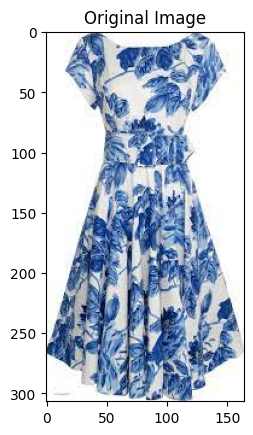

1/1 [==============================] - 0s 21ms/step
[[2.88852516e-06 5.62950397e-08 2.71915601e-09 9.98919129e-01
  3.43885593e-04 1.88650295e-09 7.34104775e-04 6.10862402e-12
  1.29629205e-08 9.69257938e-11]]
Predicted Class:  Dress
Prediction Time:  0.0818486213684082


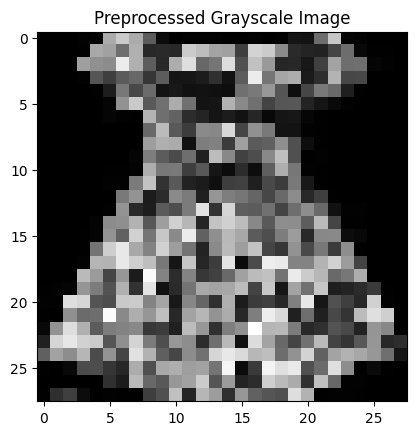

In [ ]:
#predicting the class for real time images
# preprocessed_image = preprocess_image("sample_data/dress.jpeg")
# start_time=time.time()
# predictions = model.predict(preprocessed_image)
# pred_time= time.time()-start_time
# print(predictions)
# print("Predicted Class: ",class_labels[np.argmax(predictions)])
# print("Prediction Time: ", pred_time)

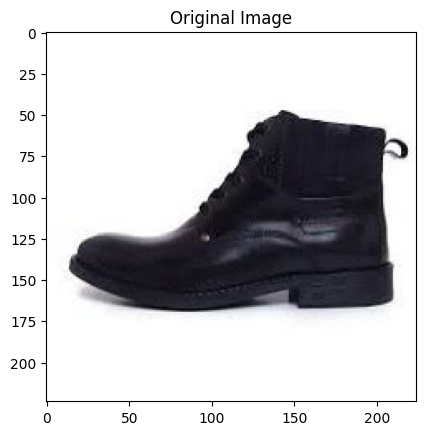

1/1 [==============================] - 0s 31ms/step


C:\Users\Manpreet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


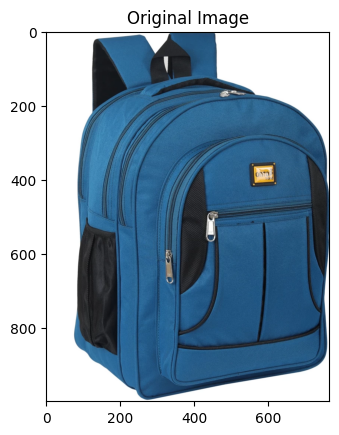

1/1 [==============================] - 0s 16ms/step


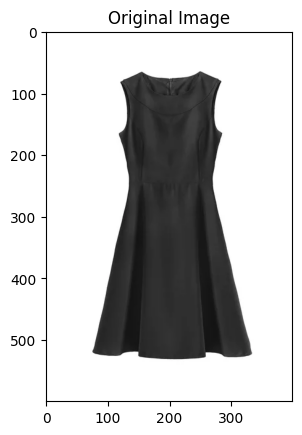

1/1 [==============================] - 0s 16ms/step


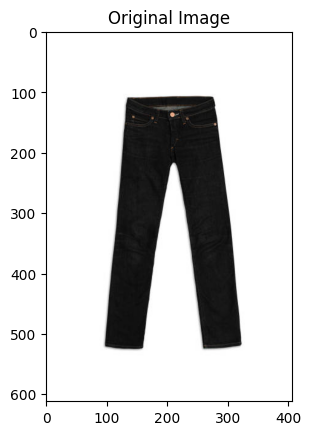

1/1 [==============================] - 0s 26ms/step


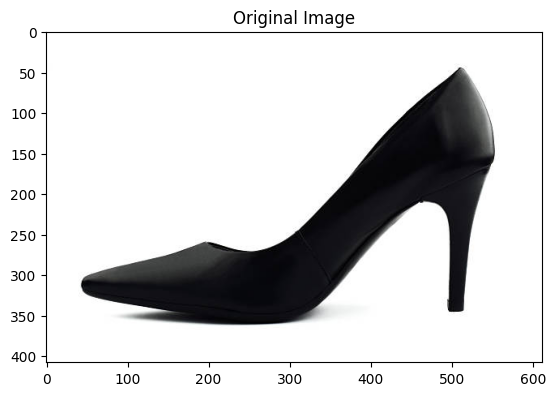

1/1 [==============================] - 0s 16ms/step


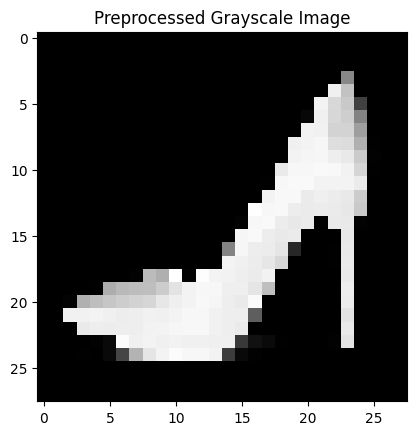

In [13]:
# import tkinter as tk
# from tkinter import filedialog
# # Create a Tkinter window
# root = tk.Tk()
# root.title("Fashion MNIST Image Classifier")

# # Function to browse folder and select an image
# def browse_image():
#     file_path = filedialog.askopenfilename()
#     if file_path:
#         preprocessed_image = preprocess_image(file_path)
#         predictions = model.predict(preprocessed_image)
#         predicted_class = class_labels[np.argmax(predictions)]
#         result_label.config(text=f"Predicted Class: {predicted_class}")

# # Create a button to browse the image
# browse_button = tk.Button(root, text="Browse Image", command=browse_image)
# browse_button.pack(pady=10)

# # Label to display the predicted class
# result_label = tk.Label(root, text="")
# result_label.pack(pady=5)

# # Start the Tkinter event loop
# root.mainloop()